In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import bokeh
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  
import plotly as py
import plotly.graph_objs as go


['master.csv']


In [123]:
df=pd.read_csv('../input/master.csv')
df.head() # have a look on the data table

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# First glance on the data

First Let us investigate the global trend in number of suicides versus year and see if there is a global correlation with the GDP?

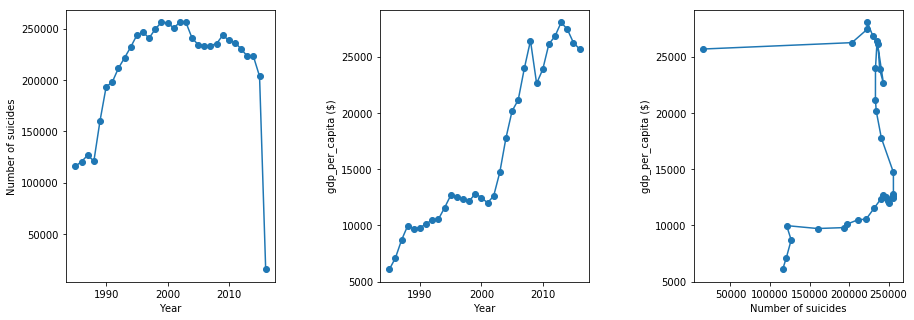

In [124]:
years = sorted(df.year.unique())
total_suicides = []
avg_gdp = []
for year in sorted(years):
    total_suicides.append(df[df['year']==year]['suicides_no'].sum())
    avg_gdp.append(df[df['year']==year]['gdp_per_capita ($)'].mean())

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) 
ax1.plot(years,total_suicides,'-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides')


ax2.plot(years, avg_gdp,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('gdp_per_capita ($)')

ax3.plot(total_suicides, avg_gdp,'-o')
ax3.set_xlabel('Number of suicides')
ax3.set_ylabel('gdp_per_capita ($)')
fig.subplots_adjust(wspace=0.5)

Apperently, the data for year 2016 is not full, so it has to be excluded.

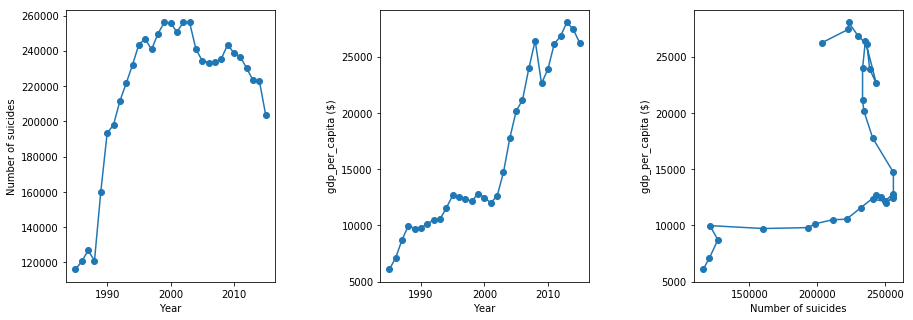

In [125]:
df=df[df.year!=2016] #drop year 2016

years = sorted(df.year.unique())
total_suicides = []
avg_gdp = []
for year in sorted(years):
    total_suicides.append(df[df['year']==year]['suicides_no'].sum())
    avg_gdp.append(df[df['year']==year]['gdp_per_capita ($)'].mean())

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5)) 
ax1.plot(years,total_suicides,'-o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides')


ax2.plot(years, avg_gdp,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('gdp_per_capita ($)')

ax3.plot(total_suicides, avg_gdp,'-o')
ax3.set_xlabel('Number of suicides')
ax3.set_ylabel('gdp_per_capita ($)')
fig.subplots_adjust(wspace=0.5)

# Time relation of suicides vs GDP

As can be seen the relation is not linear. The number of suicides rapidly increased from 1990 to 2000 and startd do go down since. The number of suicides has saturated at certain value of gdp per capita and remains almost constant. So in general there is a sign that some more interesting relation is hidden within the data. We are going to have a closer look on it.

Let us see if there is better relation with the overall population. Since with increase of population the number of suicides should also go up, we have to normalize the number of suicides, lets say per 100000 inhabitants.

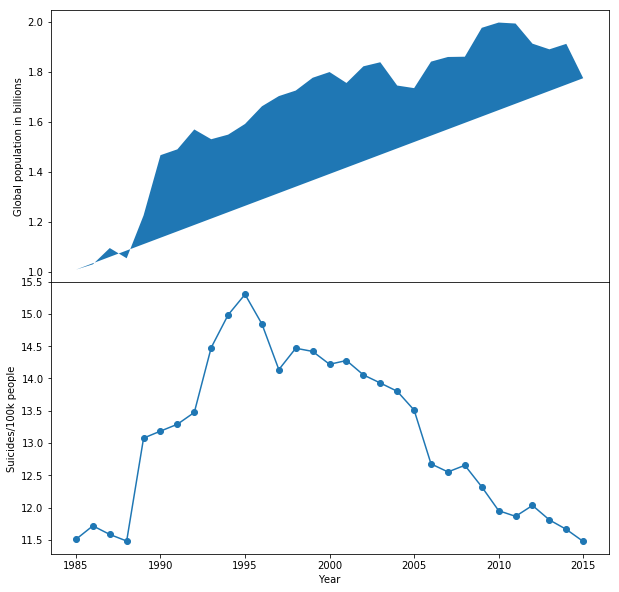

In [126]:
population = []
for year in sorted(years):
    population.append(df[df['year']==year]['population'].sum())

fig , (ax1,ax2) = plt.subplots(2,1,figsize=(10,10),sharex=True)
ax1.fill(years,np.array(population)/1e9)
ax1.set_ylabel('Global population in billions')

ax2.plot(years,np.array(total_suicides)/np.array(population)*100000,'-o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Suicides/100k people')
fig.subplots_adjust(hspace=0)

Nice, we now can see clearly that since 1985 the rate of suicides increased by 33%, having its maximum in 1994, and after, started to deacrease, reaching in 2015 the values of 1985. This is irregardless of much higher population. So maybe people are getting happier?

# Age group statistics 

What about the age of the suiciders, who are more likely to commit a suicide, a teenager, an adult?

In [127]:
age_groups = df['age'].unique()
# sorted string values according to the float key
age_groups = sorted(age_groups,key=lambda x: float(x[0:1])) 
age_groups.insert(0, age_groups.pop(4))

suicides = [[df[df['age']==age]['suicides_no'].sum()] for age in age_groups]
suicides = np.array(suicides).reshape(len(suicides))
suicides = suicides/sum(suicides) #probability distribution

data = [go.Bar(
            x=age_groups,
            y=suicides
    )]

py.offline.iplot(data, filename='Age-suicide')

What about gender ratio?


In [128]:
suicides_male = [[df[df['age']==age][df['sex']=='male']['suicides_no'].sum()] for age in age_groups]
suicides_male = np.array(suicides_male).reshape(len(suicides))
suicides_male = suicides_male/sum(suicides_male) #probability distribution

suicides_female = [[df[df['age']==age][df['sex']=='female']['suicides_no'].sum()] for age in age_groups]
suicides_female = np.array(suicides_female).reshape(len(suicides))
suicides_female = suicides_female/sum(suicides_female) #probability distribution

trace1 = go.Bar(
    x=age_groups,
    y=suicides_male,
    name='Male'
)
trace2 = go.Bar(
    x=age_groups,
    y=suicides_female,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

py.offline.iplot(data, filename='male/female')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/opt/c

Hoho, interesting, the ratio changes dependent on the age group. While for teens and middle-aged females are less likely to commit a suicide, for elderly and kids groups we can see an opposite. In principle, for elder group we can understand it according to the longer life expactancy for women. But the kid group show a wierd result, the probability is almost two times higher for girls...

We can see that adults, who are in the middle of their life are most probable to commite suicide. Career problems, divorses, simple anxiety? Who knows? But it is interesting to have a look if it has always been like this?

#  Distribution over the years

In [129]:
SPR = [] # suicides per year
for year in years:
    suicides = [[df[(df['year']==year)&(df['age']==age)]['suicides_no'].sum()] for age in age_groups]
    suicides = np.array(suicides).reshape(len(suicides))
    suicides = suicides/sum(suicides) #probability distribution
    SPR.append(suicides)

SPR = np.array(SPR)
SPR.shape

(31, 6)

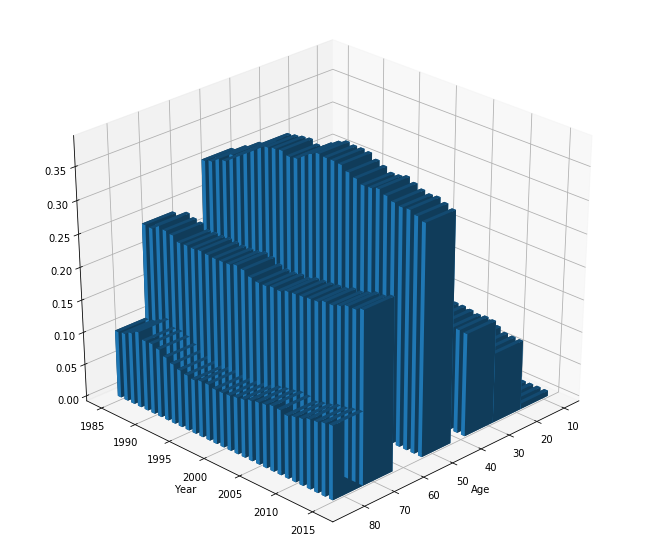

In [130]:
ag=[10,20,30,45,65,75]
X,Y = np.meshgrid(ag,years)
X, Y = X.ravel(), Y.ravel()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(121, projection='3d')
bottom = np.zeros_like(SPR.flatten())
width = 10
depth=0.5
ax1.bar3d(X, Y, bottom, width, depth, SPR.flatten())
ax1.set_xlabel('Age')
ax1.set_ylabel('Year')
ax1.view_init(30, 45)

The matplotlib does the job, but it looks pretty ugly. Let us try another plot using plotly.

In [131]:
trace1 = go.Bar(
    x=years,
    y=[s[:][0] for s in SPR],
    name=age_groups[0],
    marker=dict(
        color='rgb(204, 0, 0)'
    )
)

trace2 = go.Bar(
    x=years,
    y=[s[:][1] for s in SPR],
    name=age_groups[1],
    marker=dict(
        color='rgb(255, 102, 0)'
    )
)


trace3 = go.Bar(
    x=years,
    y=[s[:][2] for s in SPR],
    name=age_groups[2],
    marker=dict(
        color='rgb(204, 204, 0)'
    )
)


trace4 = go.Bar(
    x=years,
    y=[s[:][3] for s in SPR],
    name=age_groups[3],
    marker=dict(
        color='rgb(0, 204, 0)'
    )
)


trace5 = go.Bar(
    x=years,
    y=[s[:][4] for s in SPR],
    name=age_groups[4],
    marker=dict(
        color='rgb(0, 204, 204)'
    )
)

trace6 = go.Bar(
    x=years,
    y=[s[:][5] for s in SPR],
    name=age_groups[5],
    marker=dict(
        color='rgb(0, 0, 204)'
    )
)

data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title='Suicides over the years',
    xaxis=dict(
        tickfont=dict(
            size=18,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Suicide probability',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    ),
    barmode='group',
    bargap=0.2,
    bargroupgap=0.15
)

py.offline.iplot(data, filename='year-age')

Good, now we can see that over the years  the distribution remained almost similar, with a bit increasing suicide levels for middleagers in 2000s! I mean .com bubble, you know? I guess it was a time of broken dreams. (Note: you can activate and deactivate the age groups simply by clicking on the label on the legend).

# Geospatial data

Now it is time for geospatial data, lets see which nation is the most inclined towards suicides? I bet on japan! We will use plotly and its beautiful maps to visualize the data. But before we have to prepare data. We simply make a mapper function MapData to extract the data we need and form a list Data for the plotly.

In [132]:
def MapData(year,df):
    ydb=df[df['year']==year]
    out={}
    for count in np.unique(ydb.country.values):
        suic=sum(ydb[ydb['country']==count]['suicides/100k pop'])
        out[count]=suic
    result=pd.DataFrame(out,index=[1])
    return result.transpose()

In [133]:
Data=[MapData(year,df) for year in years]

This one now contains a list of DataFrames for each year, which we can plot on the Map, and distinguish between years using a slider.

In [186]:
# Compose data list using all Dataframes from Data variable
data = [ dict(
        type = 'choropleth',
        locationmode='country names',
        locations = ybd.index, #ydb['Country'],
        z = ybd[1].values,
        text = ybd.index,#df['Country'],
        colorscale = [[0,"rgb(255, 12, 12)"],[0.35,"rgb(255, 122, 12)"],[0.5,"rgb(255, 150, 12)"],\
            [0.6,"rgb(225, 180, 12)"],[0.7,"rgb(225, 239, 12)"],[1,"rgb(225, 225, 225)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            
            tickprefix = '',
            title = 'Suicides/100K'),
      ) for ybd in Data]




# Generate steps and sliders to update the graph
steps = []
for i in range(len(data)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


# Make up a layout of the graph
layout = dict(
    title = 'Global Suicide levels',
    width = 1000,
    height = 1000,
    geo = dict(
        showframe = False,
        showcoastlines = True,
        
        projection = dict(
            type = 'natural earth'
        )
    ),
    sliders = sliders,
)

    

# Initialize
fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

So, I was wrong! Japan show a stable level of suicides between 200-300 people per 100k, as well as countries such as USA and Canada, with values of around 170. The absolute leader is Russia! After the USSR broke up, the level of criminality was tromendouse in the post Soviet union countries. We can see that global level of suicides peaks in 1995, which coinsides with the peak values in the post Soviet union countries. Well, it was a hard time and many murders were considered labled as suicides. Interestingly, while after 2000, the rate of suicedes in these countries goes down, in Lithuania the rate of decrease is slower, and in 2015 it still remains on a relatively high level of 385 per 100k.

It is very nice to see the geo-spatial plots to compare data between different countries. However, it is sometimes overwhelming and hard to get trends. Let us have a closer look on the data in other format. We can still use the slider to seperate the years, but I would like to represent the suicide rates as a bar plot in descending order.
Let us first prepare the data for plotting. This can be easily done by groupby method, which results a multiindex dataframe, with index on years and on countries. Now we can create a list iterating on the year and pass the index (country) and values (suicide rate) as x and y to the go object.


In [135]:

year_trend=df.groupby(['year','country']).sum()['suicides/100k pop']
year_trend.loc[2000].index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Republic of Korea', 'Romania',
       'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines',
       'San Marino', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Afr

In [136]:
data=[go.Bar(
    x=year_trend.loc[i].sort_values(ascending=True).values,
    y=year_trend.loc[i].sort_values(ascending=True).index,
    width= 0.5,
    orientation = 'h',
    name=''
) for i in years]

steps = []
for i in range(len(years)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


layout = dict(
    title = 'Suicides per 100K',
    barmode = 'group',
    autosize=False,
    width=1000,
    height=1000,
    bargap=0.5,
    bargroupgap=1,
    sliders = sliders,
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

Not bad, this allows to trace changes in each country and to estimate the trends. However, if we are interested in specific countries, or in the countries with the highest suicide overall there is an even more convenient way to investigate the data. Everyone is familiar with the pie plots which is always a nice way to present comparative data. We can have a look at the top 5 countries with the highest suicide rate, and compare it to the rest of the world, in one simple plot. Of course, to be fancier we use the slider for the year.

In [137]:
annual_trends = df.groupby(['year','country']).sum()['suicides_no']

annual_largest = []

for i in sorted(years):
    small = annual_trends.loc[i].nsmallest(len(annual_trends.loc[i].index) - 5).sum() # find the sum of all suicides except top 5 countries in year i
    large = annual_trends.loc[i].nlargest(5)
    annual_largest.append(large.append(pd.Series({'Others':small})))





In [138]:
data=[go.Pie(
    labels = annual_largest[i].index,
    values = annual_largest[i].values,
    textinfo = "label+value+percent",
    hole = 0.4,
    marker=dict(
        line=dict(color='#ffffff', width=8)
        ),
    name = 'Country'
) for i in range(len(years))]

steps = []
for i in range(len(years)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data)],
                label='Year {}'.format(i + 1985))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0,
                pad={"t": 1},
                steps=steps)]


layout = dict(
    title = 'Top 5 countries on amount of commited suicides',
    
    sliders = sliders,
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

This type of plot provides a lot of interesting information! In 1985, a quarter of all suicides was committed in the United States, and one fifth in Japan! However, the data on Russia is missing, so the data is statistically inaccurate. Five years later, Russia took the lead with a quarter of total suicides, followed up by the US with only 12%. It is sad for me to see my country, Ukraine in the list, with 6% of suicides, especially concerning that the population of Ukraine is much smaller than other countries on the list. Ukraine takes the last place in the top 5 countries up to 2005, where France takes its to place with 4.5% of global suicides.

While between 2005 and 2010 Russian suicide rate decreases, in the US it rises, and the US takes the lead in 2010 with 16%. In 2015 the US suicide rate reaches 21.7%, while in Russia the suicide rate is only 12.5%. Although we have not seen any clear dependency on the GDP, here we can deduce, on the example of these two countries how the overall happiness and life satisfaction is related to the economic trends. In Russia, the economy was rising during these years, while the US showed some stagnation.

It is always good to have a closer look on specific countries on a usual lineplot.

In [158]:
countries = ['United States', 'Japan','Russian Federation','Ukraine','France', 'Germany']
total_by_country = df.groupby(['country','year']).sum()['suicides_no']
relative_by_country = df.groupby(['country','year']).sum()['suicides/100k pop']



In [184]:
data=[go.Scatter(
    x = years,
    y = total_by_country[i].values,
    mode= 'lines+markers',
    name = i
) for i in countries]

data2=[go.Scatter(
    x = years,
    y = relative_by_country[i].values,
    mode= 'lines+markers',
    xaxis='x2',
    yaxis='y2',
    name = i
) for i in countries]


layout = dict(
    title = 'Total amount of commited suicides',
    width = 700,
    height = 700
   
)


fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )



In [185]:
layout = dict(
    title = 'Suicides per 100K',
    width = 700,
    height = 700
   
)
fig = dict( data=data2, layout=layout )
py.offline.iplot( fig, validate=False, filename='Year trends of suicide levels' )

In [139]:
generations = pd.unique(df['generation']) # take all the existing generations

gen_suic = [df[df['generation']== gen]['suicides_no'].sum() for gen in generations] # sum over the generations

trace1 = go.Bar(
    x=gen_suic,
    y=generations,
    orientation = 'h',
    name='Generational suicides'
)


data = [trace1]
layout = go.Layout(
    barmode='group'
)

py.offline.iplot(data, filename='Gen_suic')


It is interesting to address the question of which generation is more inclined towards a suicide? First let's have a look, how many suicides each generation committed.